<a href="https://colab.research.google.com/github/maryam2111/Pemrograman_Phyton/blob/main/pertemuan%2011_image%20classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [233]:
ls

dataset@  daun@  daun.png  Untitled  Untitled0.ipynb  Untitled1.ipynb


In [234]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [235]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [236]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 32x32 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [237]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [238]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [239]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [240]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(146, 128, 128, 3)


In [241]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 59536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5953700   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 5,955,597
Trainable params: 5,955,597
Non-trainable params: 0
____________________________________________

In [264]:
#train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=32)

[INFO] training network...
Epoch 1/15
14/14 [==============================] - 4s 289ms/step - loss: 0.0209 - accuracy: 0.9909 - val_loss: 1.2700 - val_accuracy: 0.7740
Epoch 2/15
14/14 [==============================] - 4s 275ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.1844 - val_accuracy: 0.7671
Epoch 3/15
14/14 [==============================] - 4s 275ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.0371 - val_accuracy: 0.7877
Epoch 4/15
14/14 [==============================] - 4s 280ms/step - loss: 9.0277e-04 - accuracy: 1.0000 - val_loss: 1.0501 - val_accuracy: 0.7740
Epoch 5/15
14/14 [==============================] - 4s 276ms/step - loss: 3.4878e-04 - accuracy: 1.0000 - val_loss: 1.0054 - val_accuracy: 0.8082
Epoch 6/15
14/14 [==============================] - 4s 279ms/step - loss: 2.7833e-04 - accuracy: 1.0000 - val_loss: 0.9993 - val_accuracy: 0.8219
Epoch 7/15
14/14 [==============================] - 4s 278ms/step - loss: 2.1170e-04 - accuracy: 1.0000 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


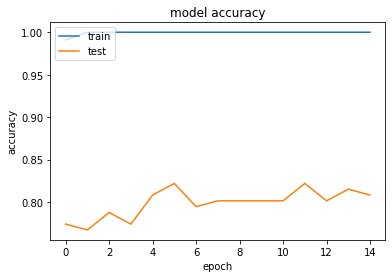

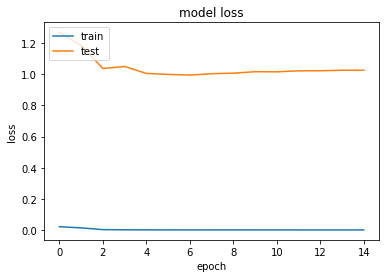

In [265]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [266]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.78      0.72      0.75        29
      GMB_02       0.80      0.82      0.81        34
      GMB_03       0.90      0.75      0.82        24
      GMB_04       0.86      0.88      0.87        34
      GMB_05       0.72      0.84      0.78        25

    accuracy                           0.81       146
   macro avg       0.81      0.80      0.81       146
weighted avg       0.81      0.81      0.81       146



In [268]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [269]:
import cv2
import matplotlib.pyplot as plt
image1='daun.png'

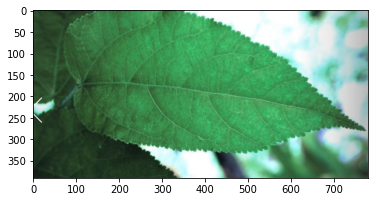

In [270]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [271]:
image_testing = Image.open('daun.png')
image_testing = np.array(image_testing.resize((128, 128)))/255.0
image_testing.shape

(128, 128, 3)

In [272]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [273]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[7.6943398e-02 8.9684623e-01 2.6210424e-02 2.4926063e-11 3.0704732e-09]]
['GMB_02']
